# VirES - access to multi-mission spaceborne magnetic field measurements - non-public demo

This notebook demonstrates access to CryoSat-2, GRACE 1/2, GOCEm GRACE-FO 1/2, CSES, ePOP LR and HR, and Swarm A/B/C magnetic field measurements avaiable from the DISC VirES server.

In [1]:
from viresclient import SwarmRequest

SERVER_URL = 'https://staging.viresdisc.vires.services/ows' # DISC server

In [2]:
from matplotlib.pyplot import subplot, figure

class AttrDict(dict):
    def __getattr__(self, key):
        return self[key]

VECTORS = AttrDict({
    "B_NEC_CHAOS": ["B_N_CHAOS", "B_E_CHAOS", "B_C_CHAOS"],
    "B_NEC": ["B_N", "B_E", "B_C"],
    "B_NEC1": ["B_N1", "B_E1", "B_C1"],
    "B_NEC2": ["B_N2", "B_E2", "B_C2"],
    "B_NEC3": ["B_N3", "B_E3", "B_C3"],
})

def plot_magnetic_data(data, product_type):
    
    def _extract_variables(variables):
        return AttrDict({
            variable: data[variable].values
            for variable in variables if variable in data
        })
    
    def _plot(ax, x, y, title, xlabel, ylabel, **opts):
        ax.plot(x, y, '.', **opts)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)
        ax.set_ylim([-250, 250])
        ax.set_xlim([-90, 90])
        ax.set_xticks([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
        ax.grid()
        return ax
        
    coords = _extract_variables(['Timestamp', 'Latitude', 'Longitude', 'Radius', 'QDLat', 'MLT'])
    models = _extract_variables(['F_CHAOS', 'B_NEC_CHAOS'])
    f_variables = _extract_variables(["F"])
    b_variables = _extract_variables(["B_NEC", "B_NEC1", "B_NEC2", "B_NEC3"])
    
    for variable, values in f_variables.items():
        delta = values - models.F_CHAOS
        
        #fig = figure()
        fig = figure(figsize=(18, 2), dpi=100)
        _plot(
            subplot(1, 1, 1),
            coords.QDLat, delta, ms=2,
            title=f'{product_type} - {variable}',
            ylabel=f"{variable} - F_CHAOS / nT",
            xlabel="QD-latitude / deg.",
        )


    for vvariable, values in b_variables.items():
        delta = values - models.B_NEC_CHAOS
        
        for idx, cvariable in enumerate(VECTORS[vvariable]):
        
            fig = figure(figsize=(18, 2), dpi=100)
            ax = subplot(1, 1, 1)
            _plot(
                ax, coords.QDLat, delta[:, idx], ms=2,
                title=f'{product_type} - {vvariable}',
                ylabel=f"{cvariable} - {VECTORS.B_NEC_CHAOS[idx]} / nT",
                xlabel="QD-latitude / deg.",
            )

# CSES Data

avaiable demo data: 2019-01-01/2019-01-31

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (1.539MB)

<xarray.Dataset>
Dimensions:      (Timestamp: 6924, NEC: 3, B_FGM1_dim1: 3, B_FGM2_dim1: 3,
                  quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2019-01-01T00:10:15.410992128 ......
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_FGM1_dim1, B_FGM2_dim1
Data variables: (12/17)
    Spacecraft   (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    B_NEC1       (Timestamp, NEC) float64 8.632e+03 -1.095e+04 ... -2.158e+04
    Longitude    (Timestamp) float64 42.81 42.31 41.86 ... 34.76 34.6 34.45
    QDLat        (Timestamp) float64 -64.74 -64.21 -63.72 ... -40.83 -40.31
    B_NEC_CHAOS  (Timestamp, NEC) float64 8.643e+03 -1.087e+04 ... -2.159e+04
    B_FGM1       (Timestamp, B_FGM1_dim1) float64 1.165e+04 ... -2.153e+04
    ...           ...
    B_FGM2       (Timestamp, B_FGM2_dim1) float64 1.179e+04 ... -2.155e+04
    F            (Timestamp) float64 3.387e+04 3.35

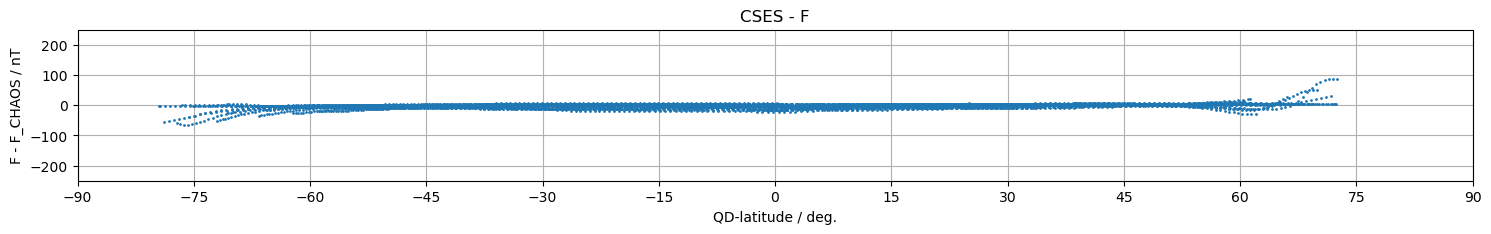

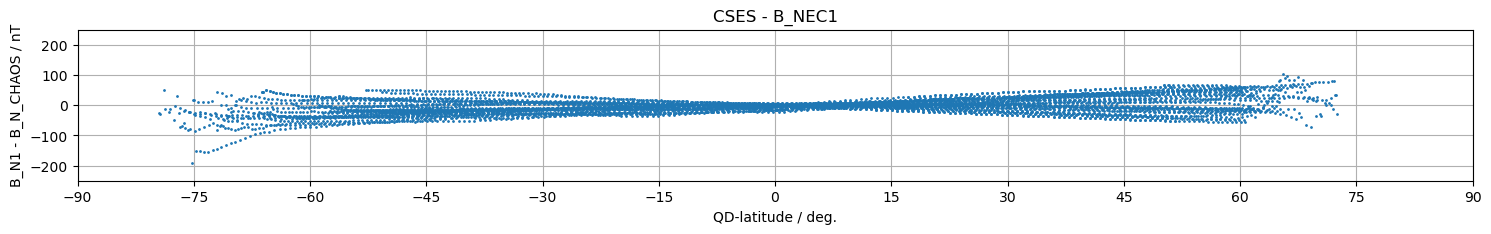

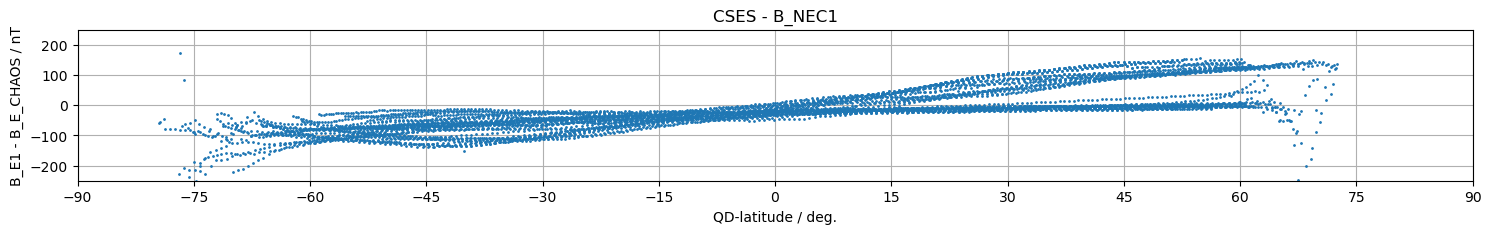

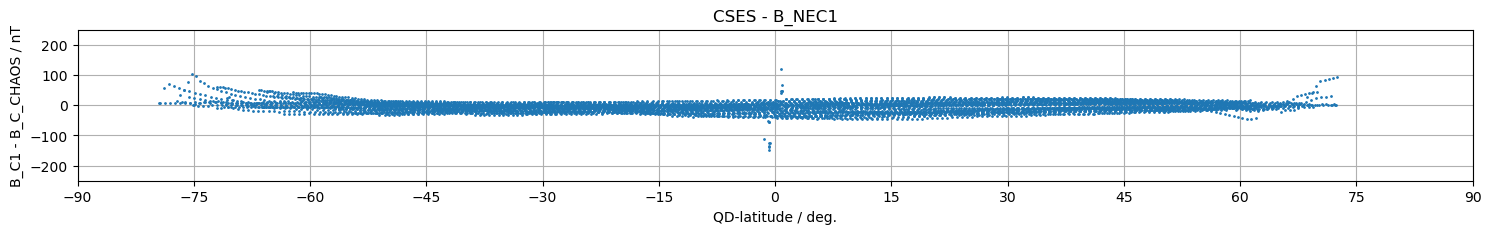

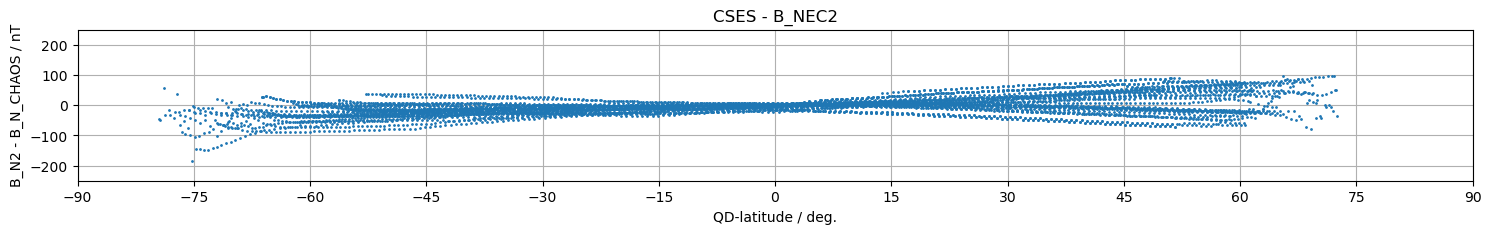

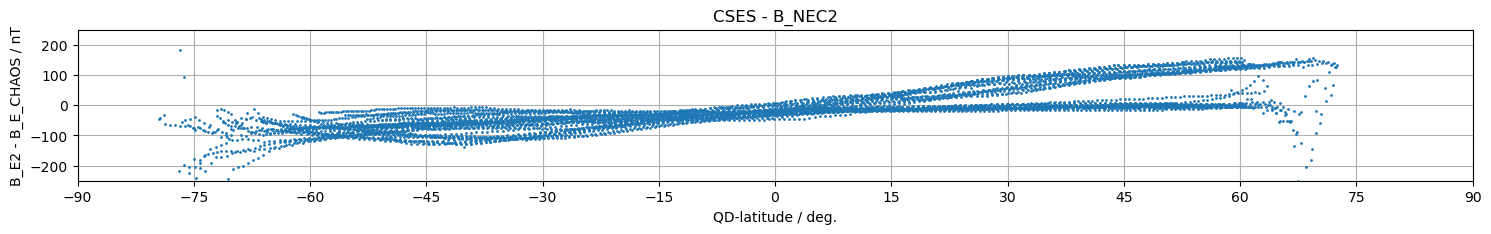

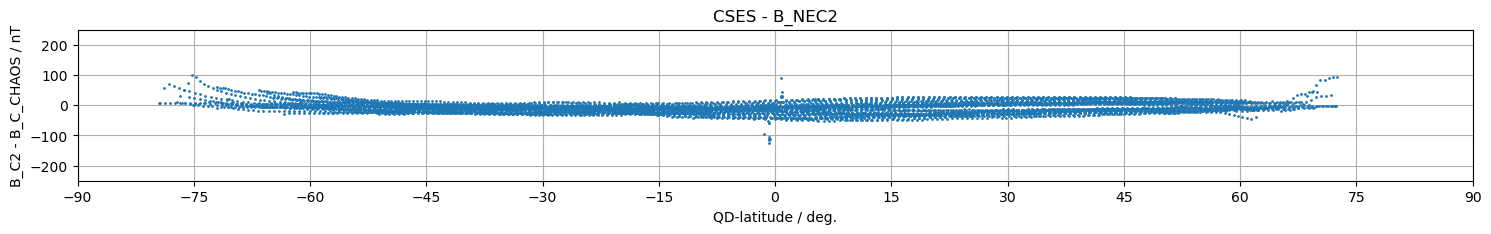

In [3]:
SwarmRequest.COLLECTIONS["MAG_CSES"] = ["CSES_01_MAG"]

SwarmRequest.PRODUCT_VARIABLES["MAG_CSES"] = [
    "F", "B_NEC1","B_NEC2", "B_FGM1", "B_FGM2",
    "q_NEC_CRF", "Flag_TBB", "Flag_MT", "Flag_SHW",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("CSES_01_MAG")
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_CSES"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'CSES')

## CryoSat-2 Data

avaiable data: 2010-04-08/2021-04-28

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (2.785MB)

<xarray.Dataset>
Dimensions:      (Timestamp: 8640, NEC: 3, B_mod_NEC_dim1: 3, B_FGM1_dim1: 3,
                  B_FGM3_dim1: 3, B_FGM2_dim1: 3, quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2016-01-01T00:00:05.272000 ... 20...
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_mod_NEC_dim1, B_FGM1_dim1, B_FGM3_dim1,
                                B_FGM2_dim1
Data variables: (12/19)
    Spacecraft   (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    B_NEC1       (Timestamp, NEC) float64 3.927e+03 2.863e+03 ... 3.768e+04
    Longitude    (Timestamp) float64 150.0 149.8 149.7 ... -31.06 -31.17 -31.34
    QDLat        (Timestamp) float64 -70.0 -70.76 -71.27 ... 63.22 63.76 64.57
    B_NEC_CHAOS  (Timestamp, NEC) float64 4.119e+03 2.974e+03 ... 3.767e+04
    B_mod_NEC    (Timestamp, B_mod_NEC_dim1) float64 4.117e+03 ... 3.767e+04
    ...           ...
    B_FGM3       (Timesta

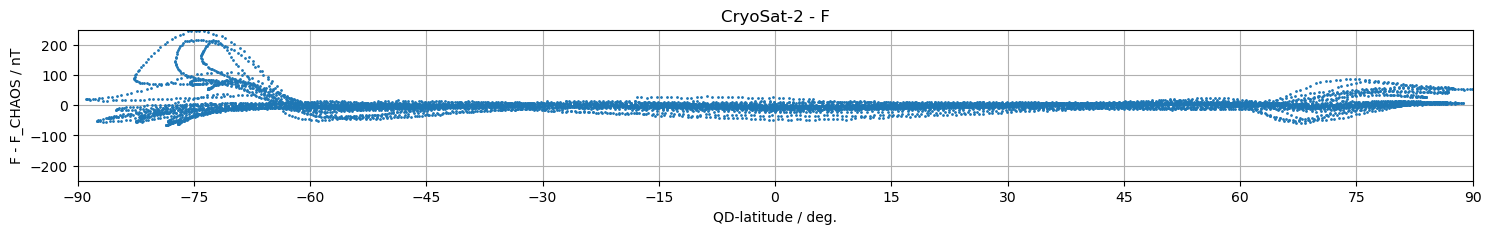

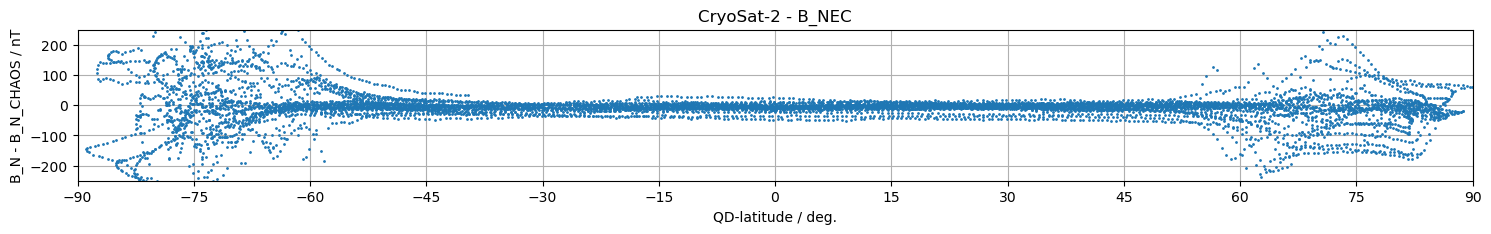

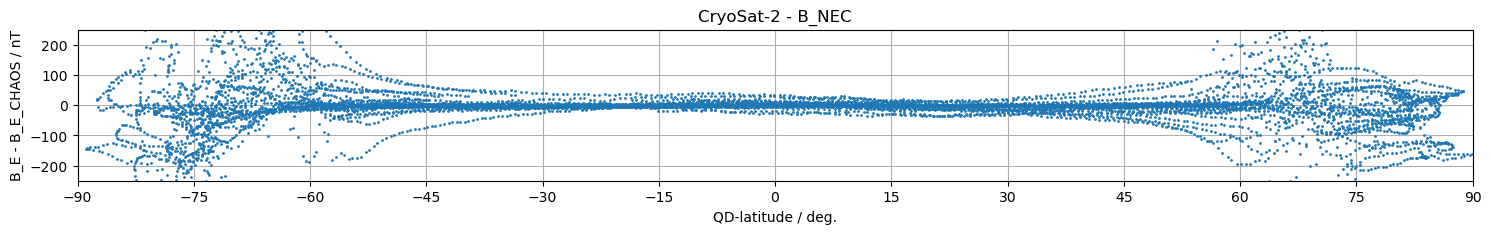

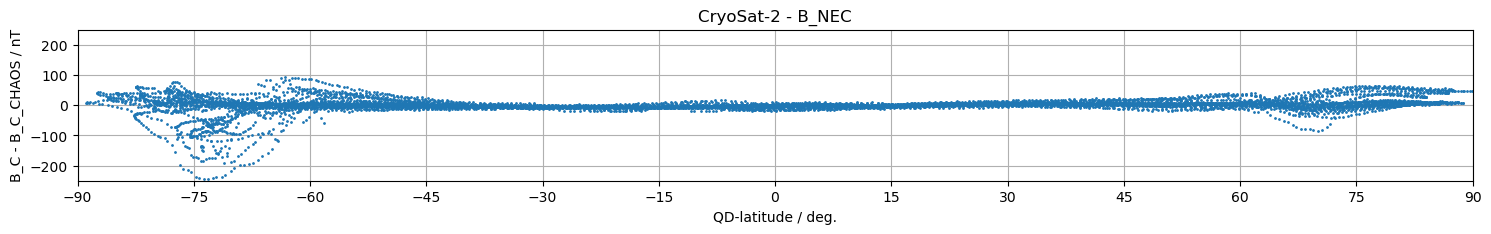

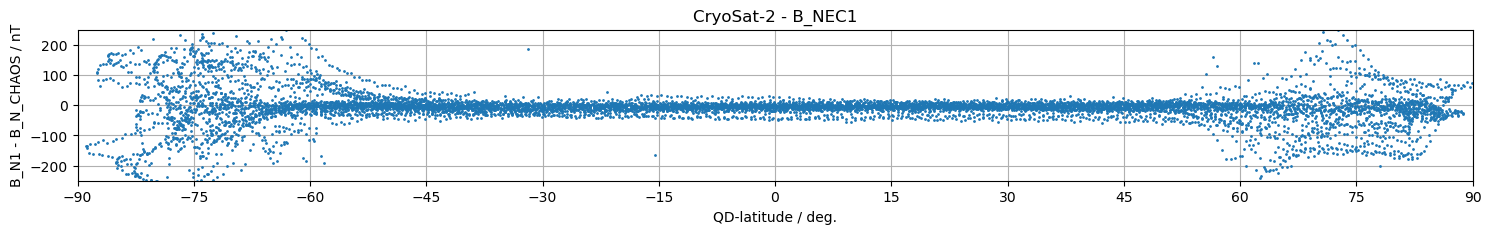

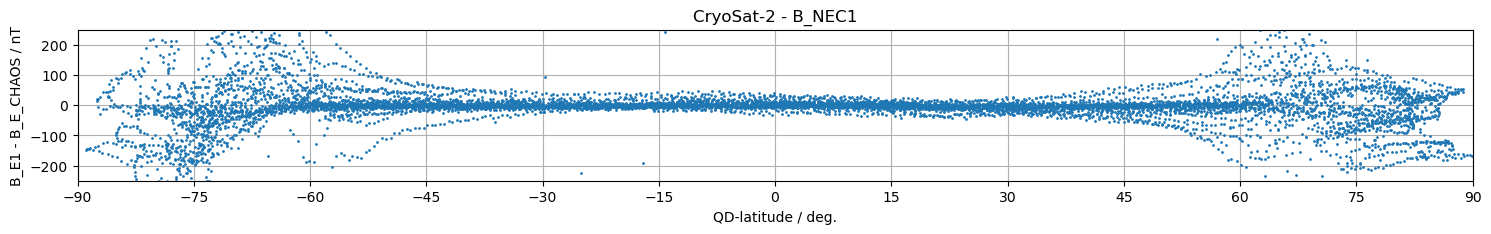

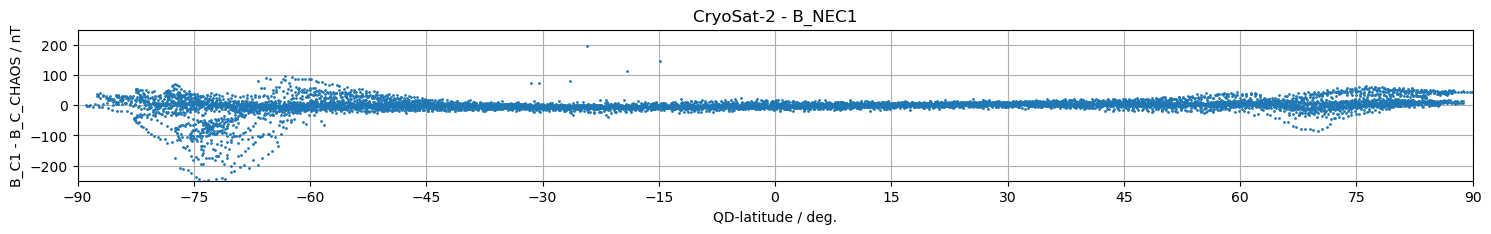

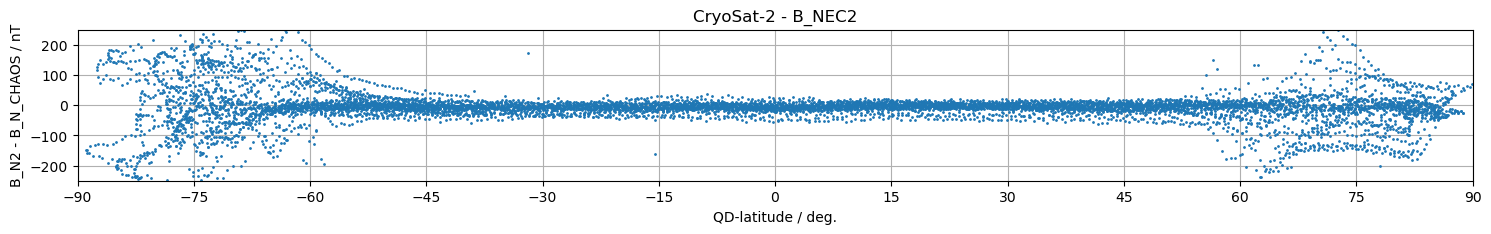

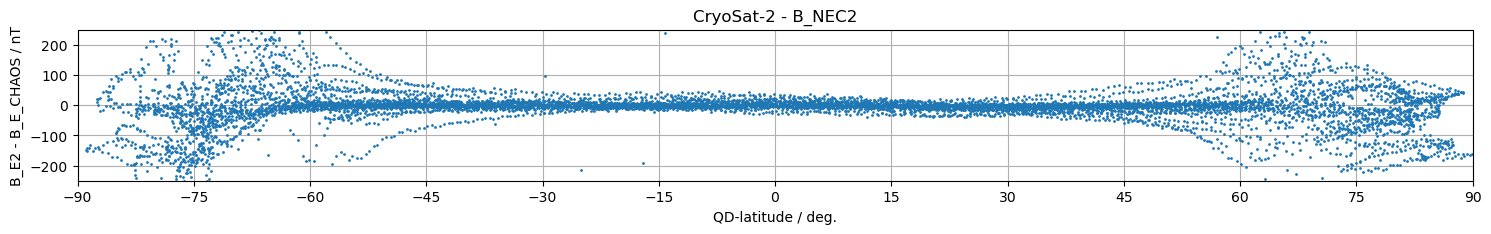

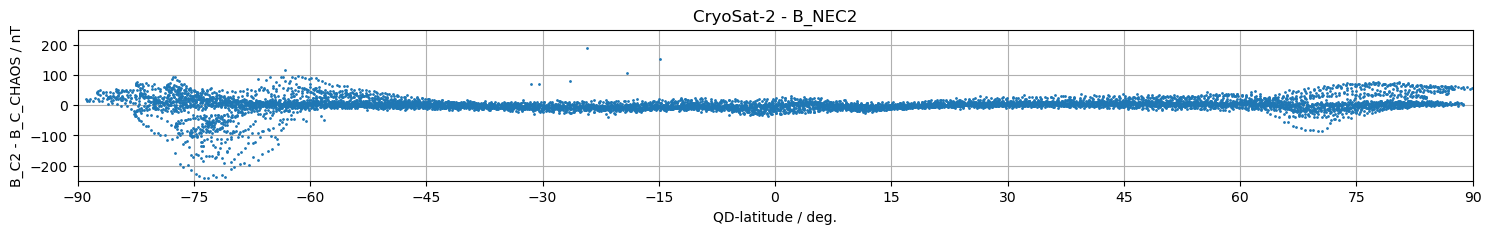

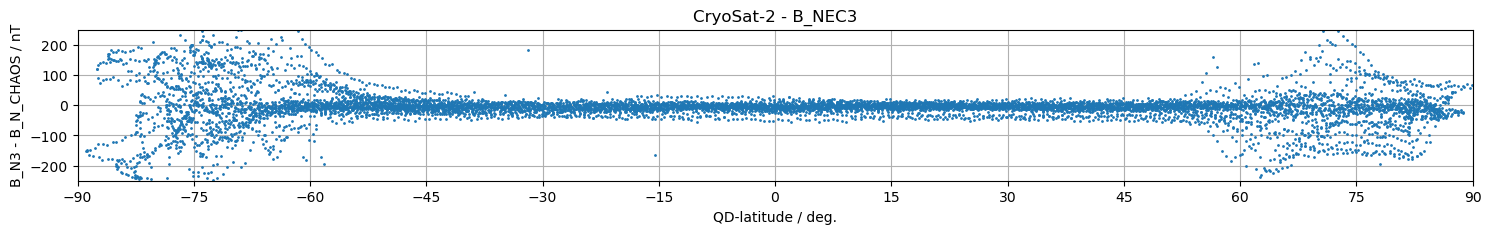

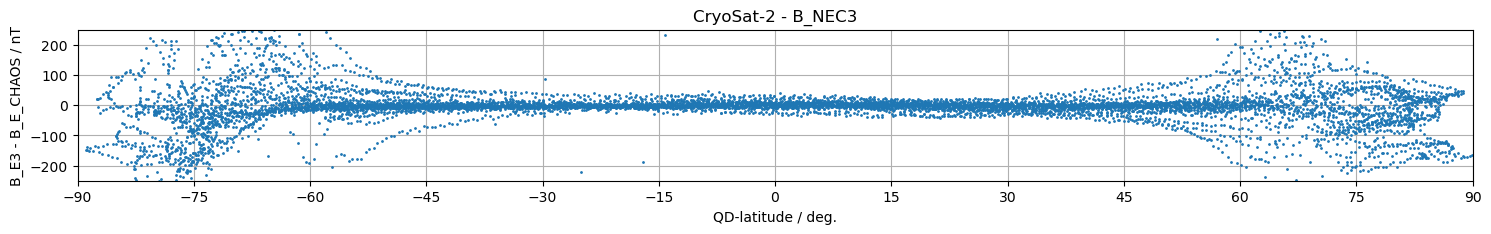

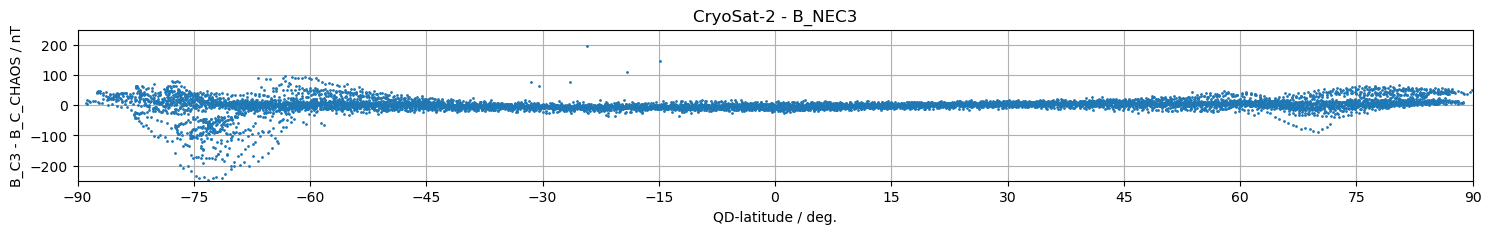

In [4]:
request = SwarmRequest(SERVER_URL)
request.set_collection("CS_OPER_MAG")
request.set_products(
    measurements=request.PRODUCT_VARIABLES['MAG_CS'],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT4S", # ~0.25Hz sampling
)

data = request.get_between(
    start_time="2016-01-01T00:00:00Z",
    end_time="2016-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'CryoSat-2')

## GOCE
avaiable data: 2009-11-01/2013-09-30

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (2.425MB)

<xarray.Dataset>
Dimensions:        (Timestamp: 5397, NEC: 3, dB_HK_SC_dim1: 3,
                    dB_MTQ_SC_dim1: 3, dB_NY_SC_dim1: 3, dB_BLOCK_CORR_dim1: 6,
                    dB_BAT_SC_dim1: 3, dB_ST_SC_dim1: 3, B_MAG_dim1: 3,
                    q_SC_NEC_dim1: 4, dB_XI_SC_dim1: 3, dB_SA_SC_dim1: 3,
                    dB_BT_SC_dim1: 3, q_MAG_SC_dim1: 4)
Coordinates:
  * Timestamp      (Timestamp) datetime64[ns] 2010-01-01T00:00:08.392000 ... ...
  * NEC            (NEC) <U1 'N' 'E' 'C'
Dimensions without coordinates: dB_HK_SC_dim1, dB_MTQ_SC_dim1, dB_NY_SC_dim1,
                                dB_BLOCK_CORR_dim1, dB_BAT_SC_dim1,
                                dB_ST_SC_dim1, B_MAG_dim1, q_SC_NEC_dim1,
                                dB_XI_SC_dim1, dB_SA_SC_dim1, dB_BT_SC_dim1,
                                q_MAG_SC_dim1
Data variables: (12/23)
    Spacecraft     (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-'
    Longitude      (Timestamp) float64 98.27 98.03 97.8 ..

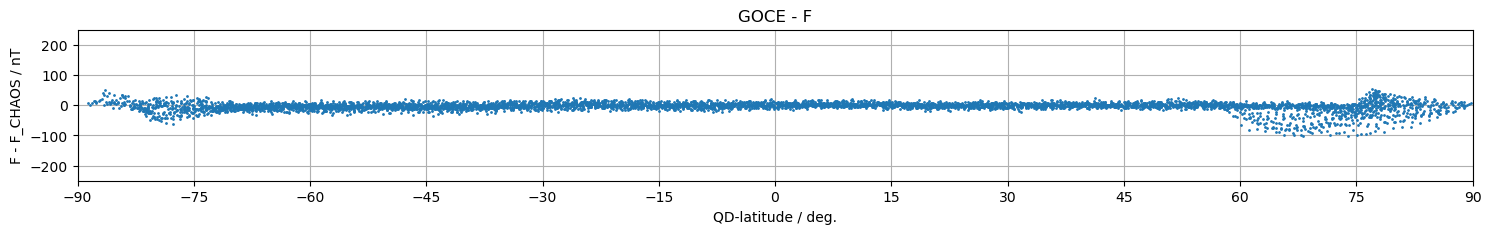

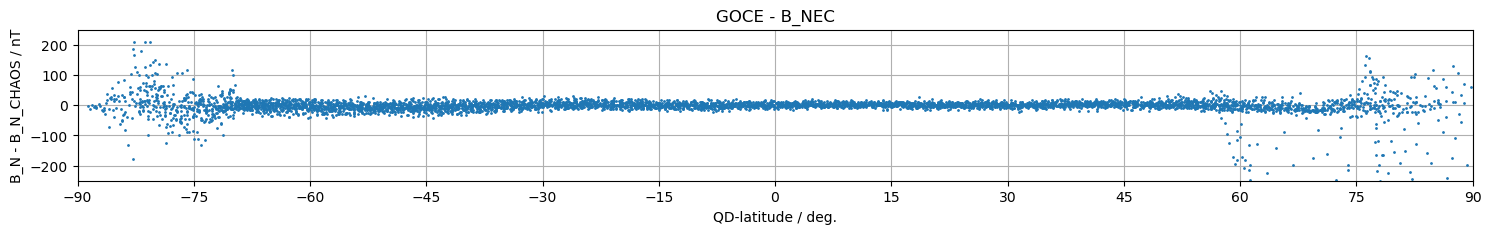

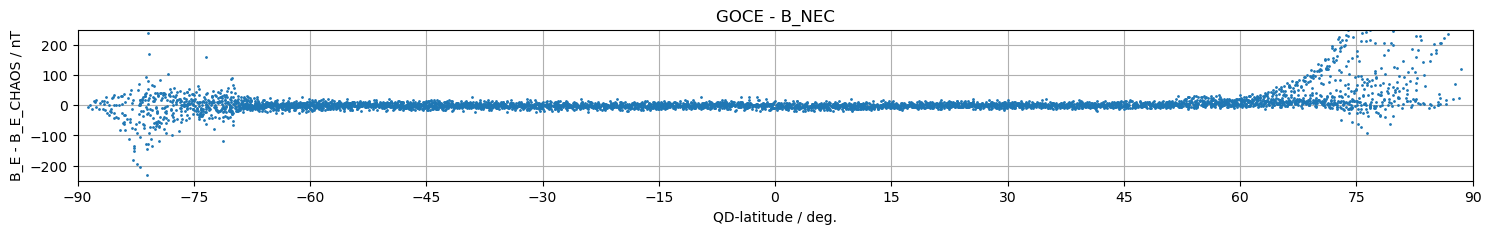

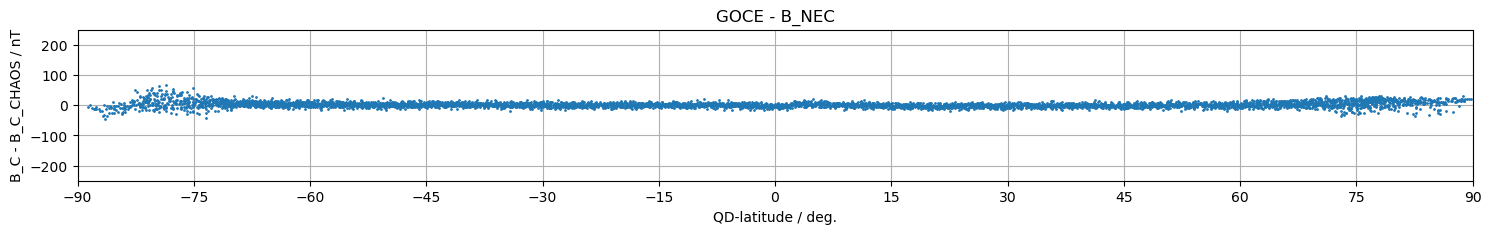

In [5]:
SwarmRequest.COLLECTIONS["MAG_GOCE"] = ["GO_MAG_ACAL_CORR"]
SwarmRequest.PRODUCT_VARIABLES["MAG_GOCE"] = [
    "F", # calculated from B_NEC
    "B_MAG",
    "B_NEC",
    "dB_MTQ_SC",
    "dB_XI_SC",
    "dB_NY_SC",
    "dB_BT_SC",
    "dB_ST_SC",
    "dB_SA_SC",
    "dB_BAT_SC",
    "dB_HK_SC",
    "dB_BLOCK_CORR",
    "q_SC_NEC",
    "q_MAG_SC",
    "B_FLAG",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("GO_MAG_ACAL_CORR")
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_GOCE"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT16S",
)

data = request.get_between(
    start_time="2010-01-01T00:00:00Z",
    end_time="2010-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GOCE')

## GRACE 1 and 2
avaiable data: 
- GRACE 1: 2008-01-01/2017-10-31
- GRACE 1: 2008-01-01/2017-09-04

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (3.351MB)

<xarray.Dataset>
Dimensions:      (Timestamp: 16624, NEC: 3, B_FGM_dim1: 3, quaternion: 4)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2016-01-01T00:00:01.899195136 ......
  * NEC          (NEC) <U1 'N' 'E' 'C'
  * quaternion   (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_FGM_dim1
Data variables: (12/14)
    Spacecraft   (Timestamp) object '1' '1' '1' '1' '1' ... '2' '2' '2' '2' '2'
    Longitude    (Timestamp) float64 -66.98 -66.69 -66.45 ... 116.5 116.4 116.4
    QDLat        (Timestamp) float64 -63.78 -62.98 -62.19 ... 21.24 20.55 19.87
    B_NEC_CHAOS  (Timestamp, NEC) float64 1.376e+04 6.55e+03 ... 2.423e+04
    B_NEC_raw    (Timestamp, NEC) float64 1.396e+04 6.635e+03 ... 2.424e+04
    B_FGM        (Timestamp, B_FGM_dim1) float64 1.39e+04 ... 2.365e+04
    ...           ...
    F            (Timestamp) float64 4.014e+04 3.968e+04 ... 3.872e+04 3.843e+04
    q_error      (Timestamp) float64 3.562e-05 7.145e-05 ... 5.866e-05 5.851e-05
    Radius  

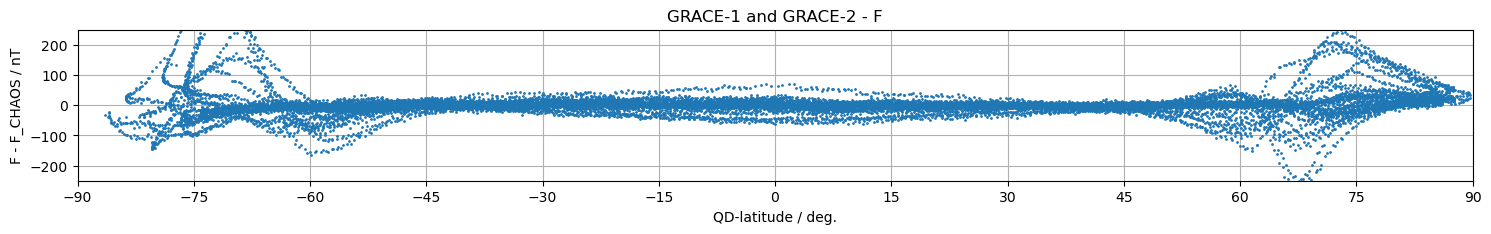

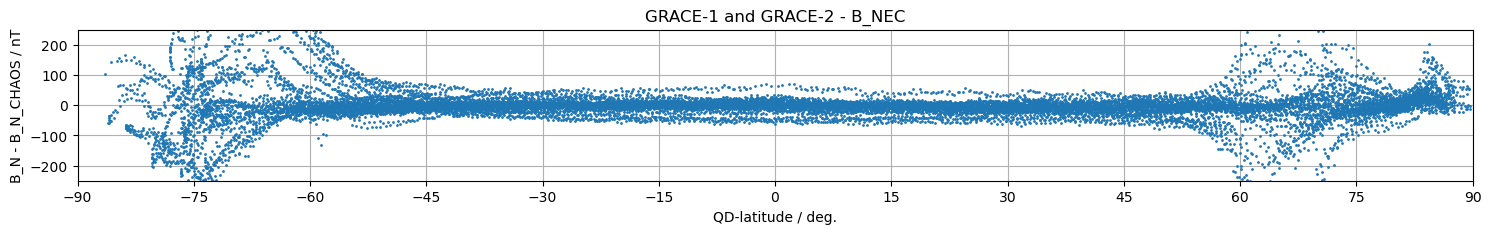

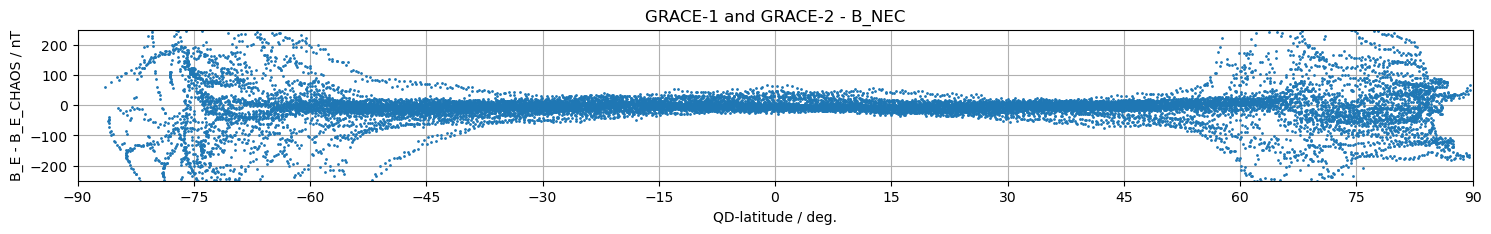

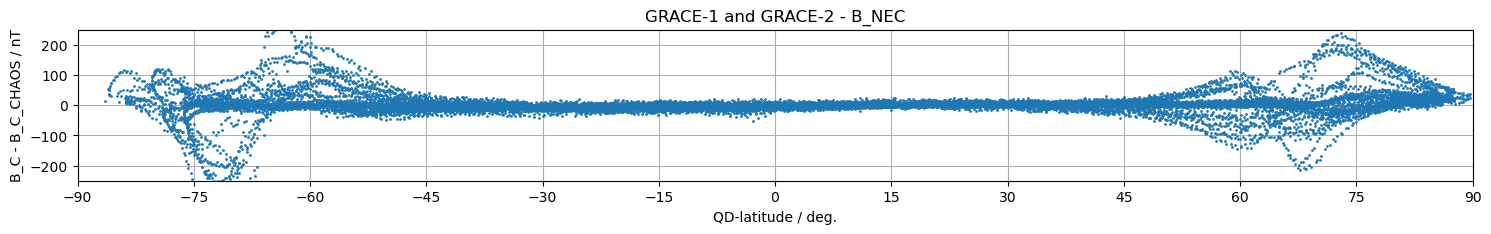

In [6]:
try:
    # temporary workaround
    request.PRODUCT_VARIABLES["MAG_GRACE"].remove('B_mod_NEC')
except ValueError:
    pass

request = SwarmRequest(SERVER_URL)
request.set_collection("GRACE_A_MAG", "GRACE_B_MAG") # request data from both GRACE 1 and 2 spacecrafts
#request.set_collection("GRACE_A_MAG") # request data from GRACE 1 spacecraft only
#request.set_collection("GRACE_B_MAG") # request data from GRACE 2 spacecraft only
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_GRACE"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2016-01-01T00:00:00Z",
    end_time="2016-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GRACE-1 and GRACE-2')

## GRACE-FO 1 and 2
avaiable data:
- GRACE-FO 1: 2018-06-01/2022-06-30
- GRACE-FO 2: 2018-06-01/2022-06-30

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (5.859MB)

<xarray.Dataset>
Dimensions:      (Timestamp: 17280, q_NEC_FGM_dim1: 4, NEC: 3,
                  dB_BAT_FGM_dim1: 3, B_FGM_dim1: 3, dB_BT_FGM_dim1: 3,
                  dB_SA_FGM_dim1: 3, dB_XI_FGM_dim1: 3, dB_MTQ_FGM_dim1: 3,
                  dB_NY_FGM_dim1: 3, dB_ST_FGM_dim1: 3)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2019-01-01 ... 2019-01-01T23:59:50
  * NEC          (NEC) <U1 'N' 'E' 'C'
Dimensions without coordinates: q_NEC_FGM_dim1, dB_BAT_FGM_dim1, B_FGM_dim1,
                                dB_BT_FGM_dim1, dB_SA_FGM_dim1, dB_XI_FGM_dim1,
                                dB_MTQ_FGM_dim1, dB_NY_FGM_dim1, dB_ST_FGM_dim1
Data variables: (12/20)
    Spacecraft   (Timestamp) object '1' '1' '1' '1' '1' ... '2' '2' '2' '2' '2'
    q_NEC_FGM    (Timestamp, q_NEC_FGM_dim1) float64 0.0006838 ... 0.9995
    Longitude    (Timestamp) float64 -70.67 -70.69 -70.72 ... 104.0 104.2 104.3
    B_NEC_CHAOS  (Timestamp, NEC) float64 1.703e+04 -561.6 ... -4.616e+04
    QDLat       

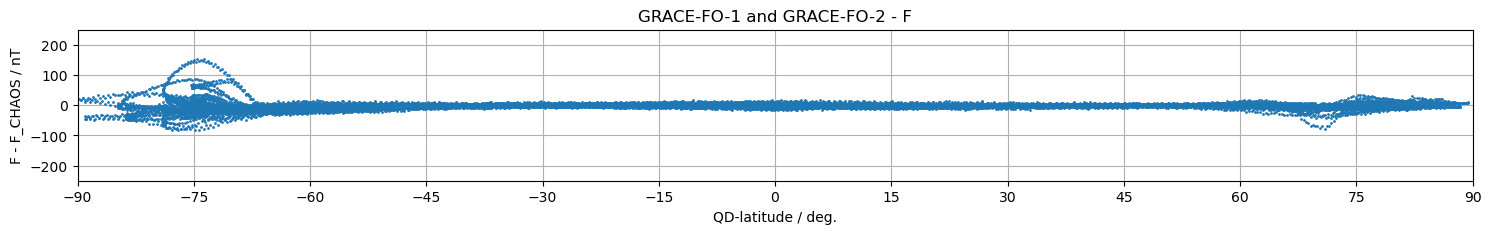

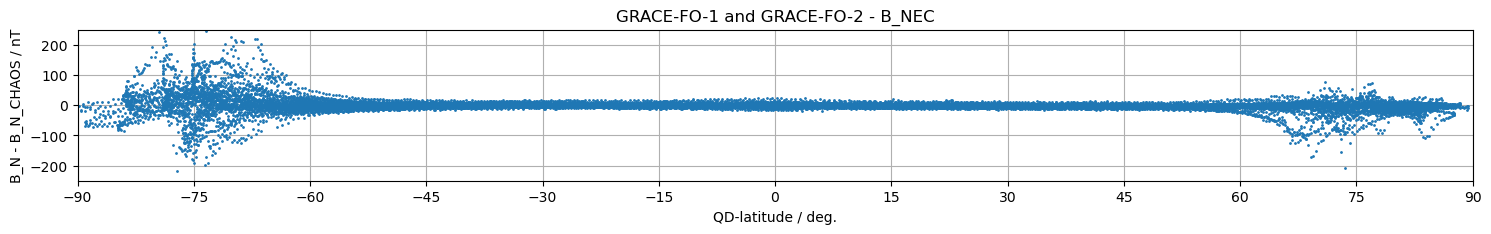

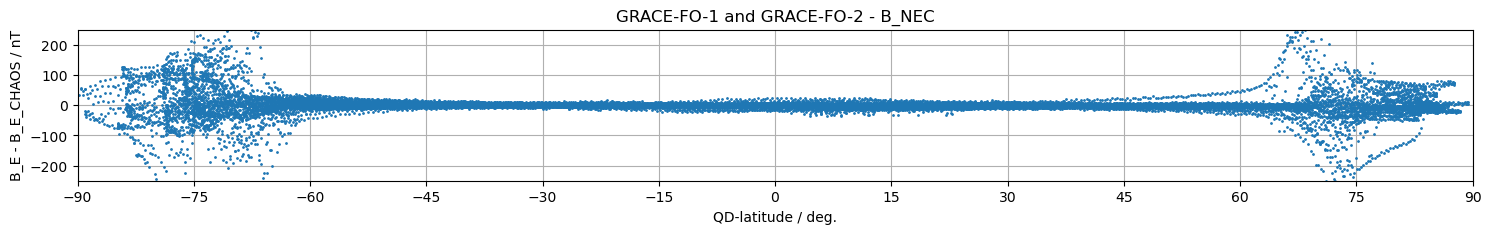

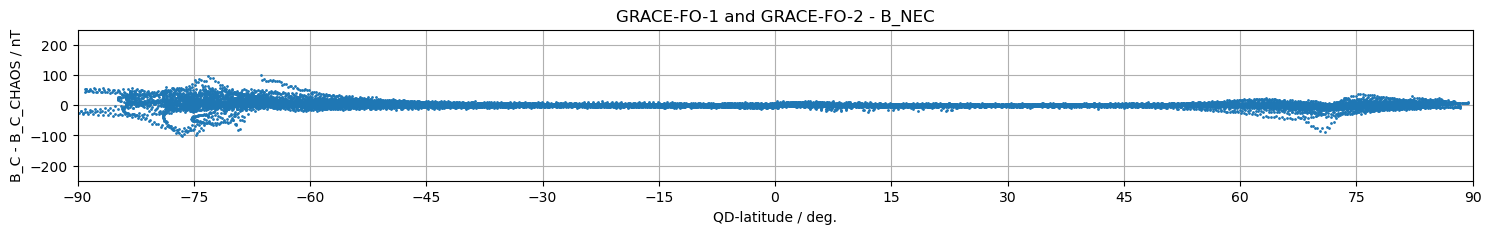

In [7]:
request = SwarmRequest(SERVER_URL)

request.set_collection("GF1_OPER_FGM_ACAL_CORR", "GF2_OPER_FGM_ACAL_CORR") # request data from both GRACE-FO 1 and 2 spacecrafts
#request.set_collection("GF1_OPER_FGM_ACAL_CORR") # request data from GRACE-FO 1 spacecraft only
#request.set_collection("GF2_OPER_FGM_ACAL_CORR") # request data from GRACE-FO 2 spacecraft only

request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_GFO"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'GRACE-FO-1 and GRACE-FO-2')

## e-POP (Swarm-E) MAG LR 1Hz - test products
avaiable data: 2016-01-01/2016-01-31, 2018-07-01/2018-07-31 and 2019-01-01/2019-01-31

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (1.775MB)

<xarray.Dataset>
Dimensions:         (Timestamp: 3383, NEC: 3, VFM: 3, B_outboard_VFM_dim1: 3,
                     CalOutboard_dim1: 4, CalOutboard_dim2: 3,
                     B_model_NEC_dim1: 3, B_inboard_VFM_dim1: 3,
                     CalInboard_dim1: 4, CalInboard_dim2: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01T00:00:01 ... 2019-0...
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_outboard_VFM_dim1, CalOutboard_dim1,
                                CalOutboard_dim2, B_model_NEC_dim1,
                                B_inboard_VFM_dim1, CalInboard_dim1,
                                CalInboard_dim2
Data variables: (12/27)
    Spacecraft      (Timestamp) object nan nan nan nan nan ... nan nan nan nan
    F_error         (Timestamp) float64 nan nan nan nan nan ... nan nan nan nan
    Longitude       (Timestamp)

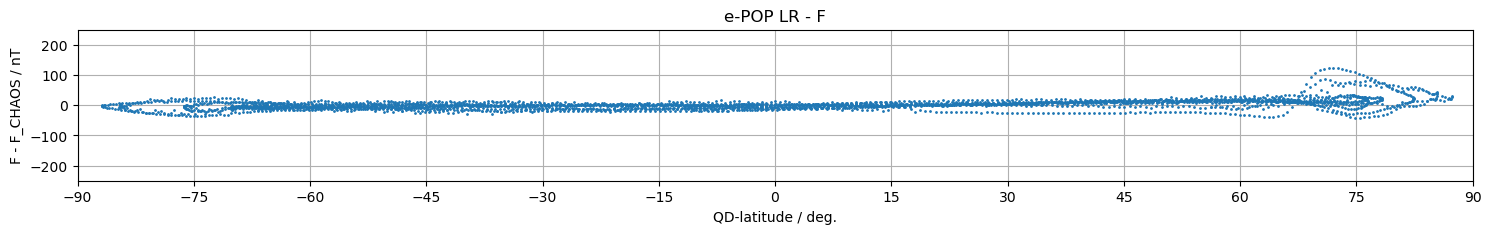

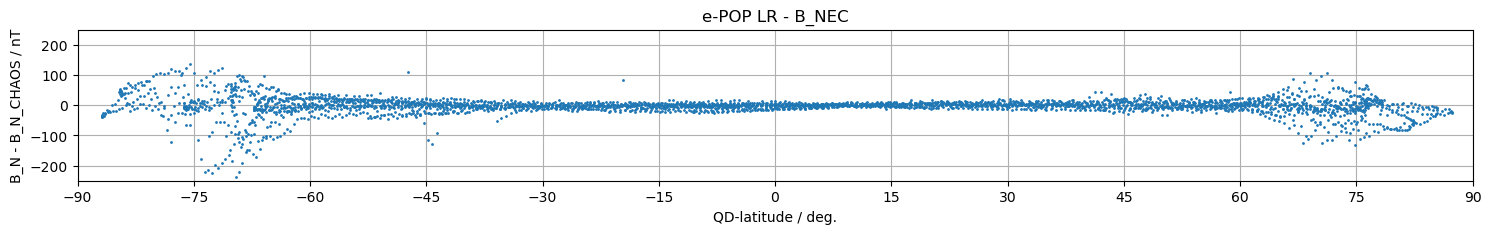

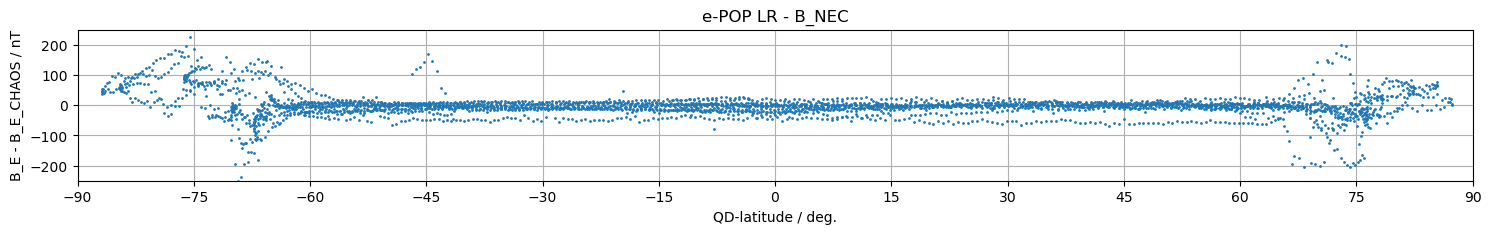

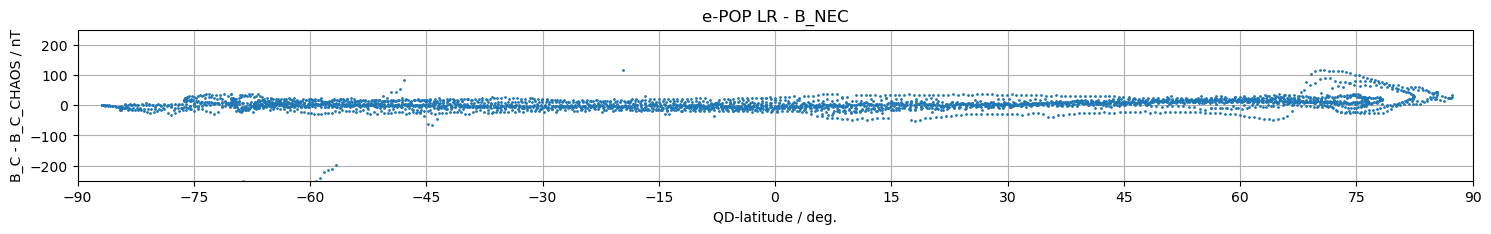

In [8]:

SwarmRequest.COLLECTIONS["MAGE_LR_1B"] = ["SW_TEST_MAGE_LR_1B"]

SwarmRequest.PRODUCT_VARIABLES["MAGE_LR_1B"] = [
    "F", "dF_other", "F_error",
    "B_inboard_VFM", "B_outboard_VFM", "B_VFM", "B_NEC", "B_model_NEC",
    "dB_other", "B_error", "q_NEC_CRF", "Att_error",
    "Flags_F", "Flags_B", "Flags_q", "Flags_Platform", "SyncStatus",
    "CalInboard", "CalOutboard",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_TEST_MAGE_LR_1B")
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAGE_LR_1B"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'e-POP LR')

## e-POP (Swarm-E) MAG HR 166Hz - test products
avaiable data: 2016-01-01/2016-01-31, 2018-07-01/2018-07-31 and 2019-01-01/2019-01-31

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (1.711MB)

<xarray.Dataset>
Dimensions:         (Timestamp: 3383, NEC: 3, VFM: 3, B_outboard_VFM_dim1: 3,
                     CalOutboard_dim1: 4, CalOutboard_dim2: 3,
                     B_model_NEC_dim1: 3, B_inboard_VFM_dim1: 3,
                     CalInboard_dim1: 4, CalInboard_dim2: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01T00:00:00.002414080 ...
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Dimensions without coordinates: B_outboard_VFM_dim1, CalOutboard_dim1,
                                CalOutboard_dim2, B_model_NEC_dim1,
                                B_inboard_VFM_dim1, CalInboard_dim1,
                                CalInboard_dim2
Data variables: (12/24)
    Spacecraft      (Timestamp) object nan nan nan nan nan ... nan nan nan nan
    Longitude       (Timestamp) float64 -162.6 -161.4 -160.2 ... -128.9 -128.9
    QDLat           (Timestamp) 

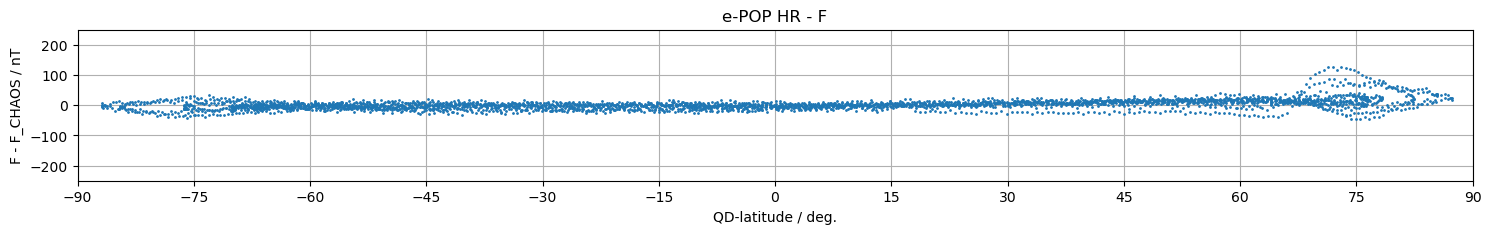

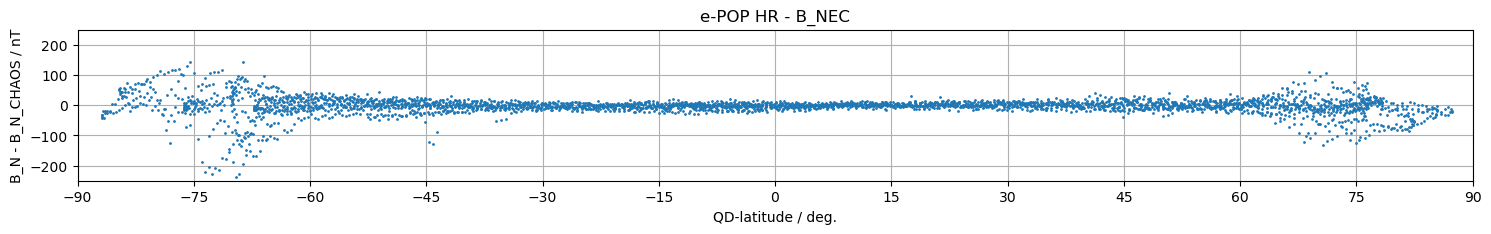

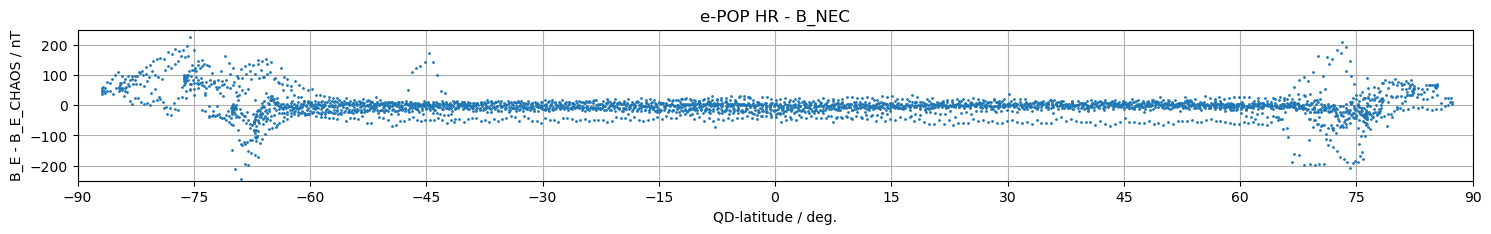

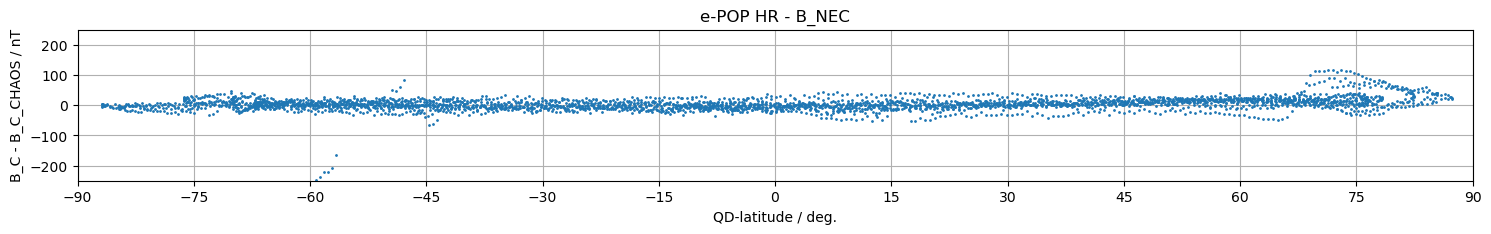

In [9]:
SwarmRequest.COLLECTIONS["MAGE_HR_1B"] = ["SW_TEST_MAGE_HR_1B"]

SwarmRequest.PRODUCT_VARIABLES["MAGE_HR_1B"] = [
    #NOTE: F is calculated on the fly from B_NEC (F = |B_NEC|)
    "F", "B_inboard_VFM", "B_outboard_VFM", "B_VFM", "B_NEC", "B_model_NEC",
    "dB_other", "B_error", "q_NEC_CRF", "Att_error", "Flags_B", "Flags_q",
    "Flags_Platform", "SyncStatus",
    "CalInboard", "CalOutboard",
]

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_TEST_MAGE_HR_1B")
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAGE_HR_1B"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT0.006S", # ~166Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'e-POP HR')

## Swarm A, B and C MAG LR 1Hz - regular products

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (8.049MB)

<xarray.Dataset>
Dimensions:         (Timestamp: 25920, VFM: 3, NEC: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01 ... 2019-01-01T23:5...
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Data variables: (12/25)
    Spacecraft      (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'C' 'C' 'C' 'C'
    dB_AOCS         (Timestamp, VFM) float64 -0.6409 0.3359 ... -0.0907 2.501
    F_error         (Timestamp) float64 0.0484 0.0427 0.0406 ... 0.0 0.0 0.0
    Longitude       (Timestamp) float64 -136.0 -136.0 -136.0 ... 42.33 42.34
    QDLat           (Timestamp) float64 -13.95 -13.31 -12.67 ... 40.62 39.94
    B_NEC_CHAOS     (Timestamp, NEC) float64 2.367e+04 5.318e+03 ... 3.623e+04
    ...              ...
    F               (Timestamp) float64 2.718e+04 2.701e+04 ... 0.0 0.0
    Flags_B         (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    q_NEC_CRF 

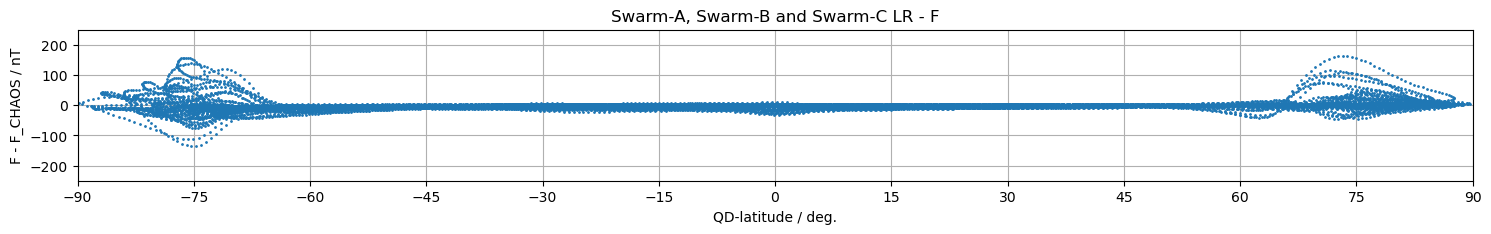

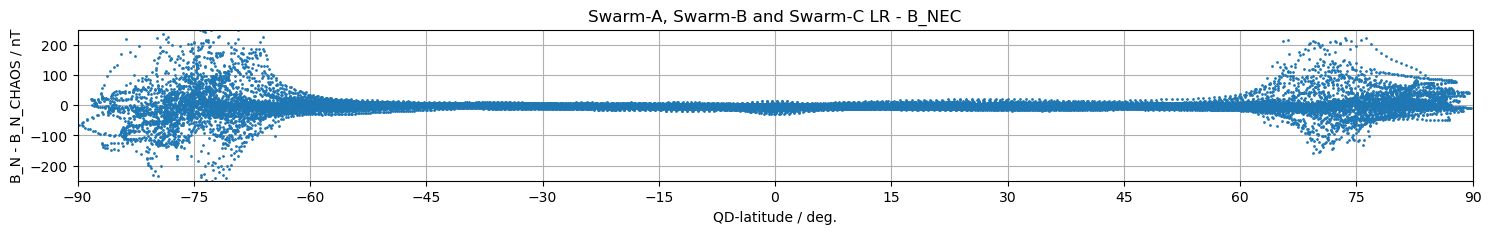

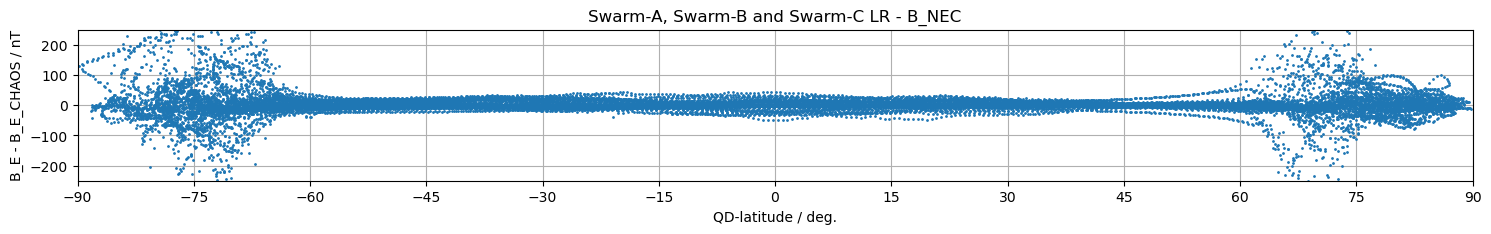

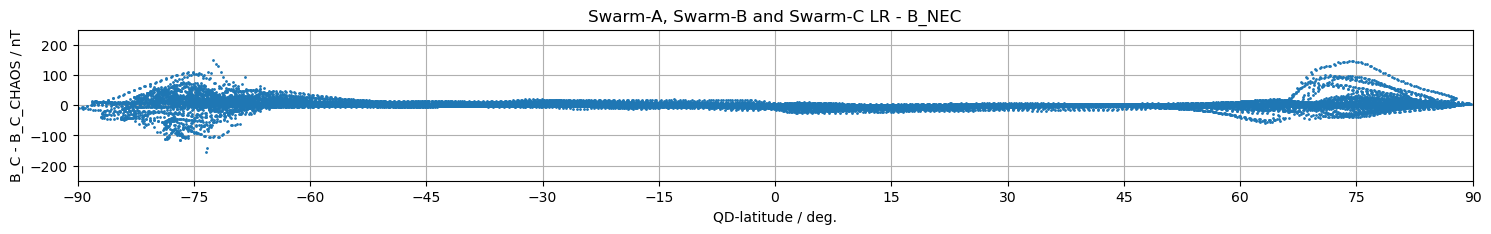

In [10]:
request = SwarmRequest(SERVER_URL)
request.set_collection(*SwarmRequest.COLLECTIONS["MAG"])
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT1S", # ~1Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'Swarm-A, Swarm-B and Swarm-C LR')

## Swarm A, B and C MAG HR 1Hz - regular products

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (7.191MB)

<xarray.Dataset>
Dimensions:         (Timestamp: 25920, VFM: 3, NEC: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2019-01-01T00:00:00.010499840 ...
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Data variables: (12/20)
    Spacecraft      (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'C' 'C' 'C' 'C'
    dB_AOCS         (Timestamp, VFM) float64 -0.6409 0.3359 ... -0.0907 2.501
    Longitude       (Timestamp) float64 -136.0 -136.0 -136.0 ... 42.33 42.34
    QDLat           (Timestamp) float64 -13.95 -13.31 -12.67 ... 40.62 39.94
    B_NEC_CHAOS     (Timestamp, NEC) float64 2.367e+04 5.318e+03 ... 3.623e+04
    Att_error       (Timestamp) float64 1.152 1.102 1.329 ... 1.126 1.266 1.233
    ...              ...
    F               (Timestamp) float64 2.718e+04 2.701e+04 ... 4.086e+04
    Flags_B         (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    q_NEC

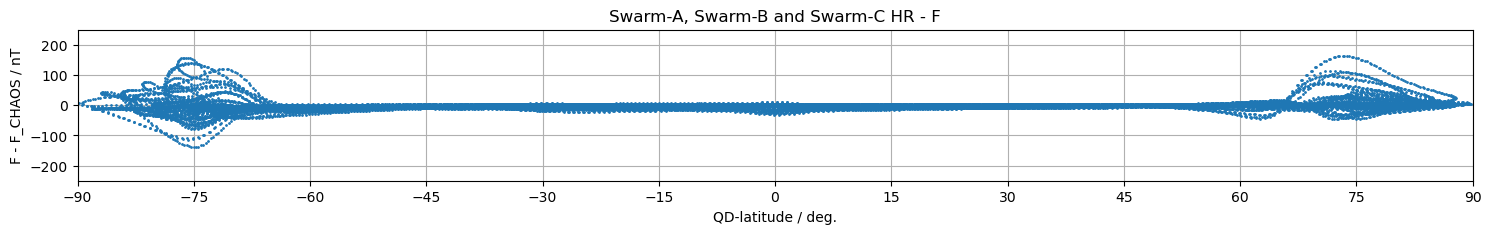

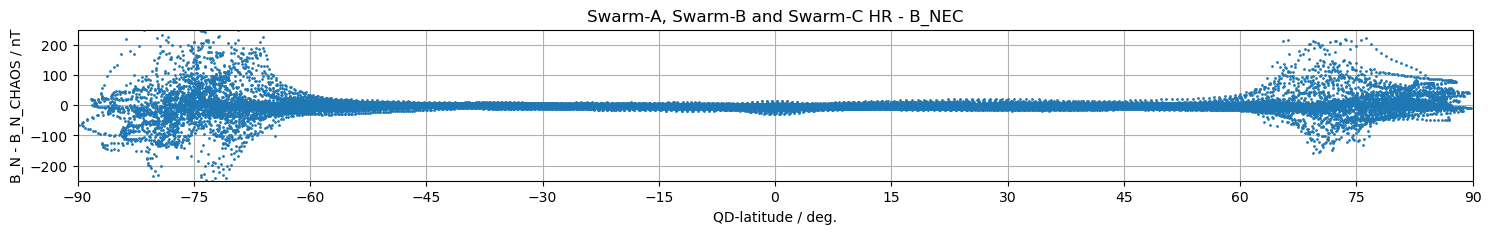

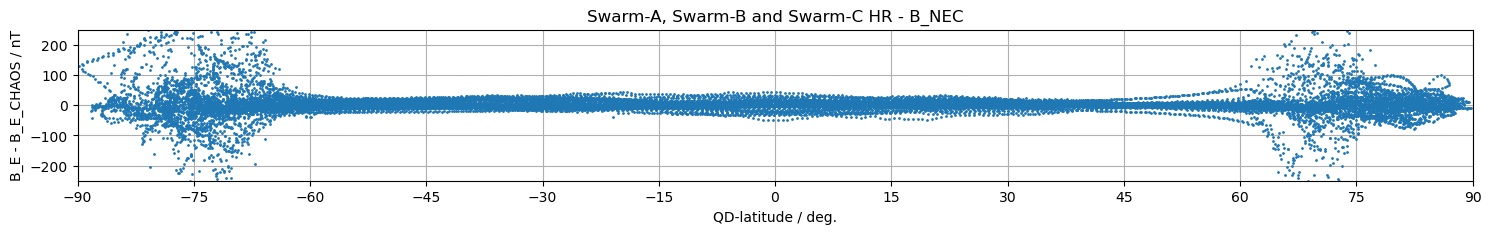

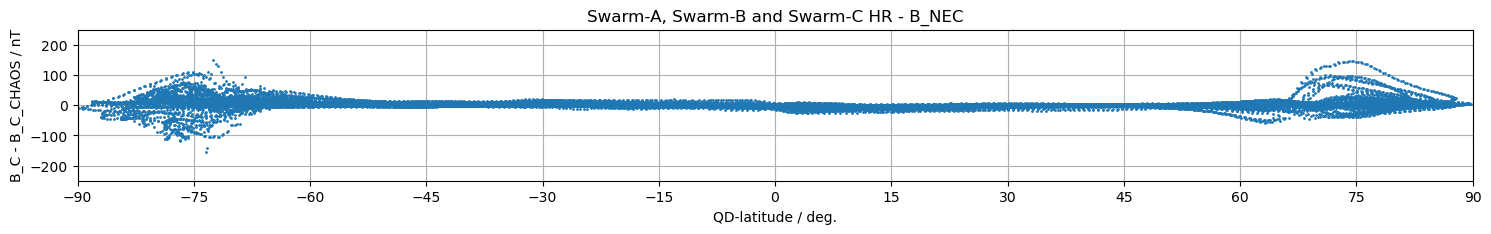

In [11]:
request = SwarmRequest(SERVER_URL)
request.set_collection(*SwarmRequest.COLLECTIONS["MAG_HR"])
request.set_products(
    measurements=request.PRODUCT_VARIABLES["MAG_HR"],
    auxiliaries=["QDLat", "MLT"],
    models=['CHAOS'],
    sampling_step="PT10S",
    #sampling_step="PT0.02S", # ~50Hz sampling
)

data = request.get_between(
    start_time="2019-01-01T00:00:00Z",
    end_time="2019-01-02T00:00:00Z",
).as_xarray()

print(data)
plot_magnetic_data(data, 'Swarm-A, Swarm-B and Swarm-C HR')